# AICP Intership Task Week 5


### Import Libraries

In [1]:
!pip install wordcloud

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"

### Reading CSV File

In [12]:
df = pd.read_csv('Instagram_data.csv',encoding='latin')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## Question no 1
Show column names and have a look at their info.

### Answer

In [4]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Question No 2

Show the descriptive statistics of the data.

### Answer

In [6]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


## Question No 3

Check if your data contains any missing values

### Answer

In [7]:
missing_values = df.isnull().sum()
missing_values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## Question No 4 
When you start exploring your data, always start by exploring the main feature of your data. For
example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
feature that contains data about reach. In our data, the Impressions column contains the data about the
reach of an Instagram post. So let’s have a look at the distribution of the Impressions.
### Answer

In [16]:

fig = px.histogram(df, x='Impressions', title="Distribution of Impressions")
pio.write_html(fig, 'plot.html')
fig.show()

# Question No 5
Have a look at the number of impressions on each post over time as shown below
### Answer

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Impressions"], mode='lines', name='Impressions'))
fig.update_layout(title="Impressions over time", xaxis_title="Index", yaxis_title="Impressions")
fig.show()

## Question No 6
Have a look at all the metrics like Likes, Saves, and Follows from each post over time as
shown below.

### Answer

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Likes"], mode='lines', name='Likes',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df["Saves"], mode='lines', name='Saves',line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=df["Follows"], mode='lines', name='Follows',line=dict(color='green')))

fig.update_layout(title="Impressions over time", xaxis_title="Date", yaxis_title="Count")
fig.show()

## Question No 7
Have a look at the distribution of reach from different sources as shown below

### Answer

In [11]:
reach = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()
reach_df = pd.DataFrame({'Sources': reach.index, 'Reach': reach.values})
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
fig = px.pie(reach_df, values='Reach', names='Sources', title="Reach from Different Sources",
             color='Sources', color_discrete_map=dict(zip(reach_df['Sources'], colors)))
fig.show()

## Question No 8
Have a look at the distribution of engagement sources as shown below

### Answer

In [12]:
engagement = df[['Likes', 'Saves', 'Shares', 'Comments']].sum()
engagement_df = pd.DataFrame({'sources': engagement.index, 'engagement': engagement.values})
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
fig = px.pie(engagement_df, values='engagement', names='sources', title="Engagemnet Sources",
            color='sources', color_discrete_map=dict(zip(engagement_df['sources'], colors)))
fig.show()

## Question No 9
Have a look at the relationship between the number of profile visits and follows as shown below
### Answer

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



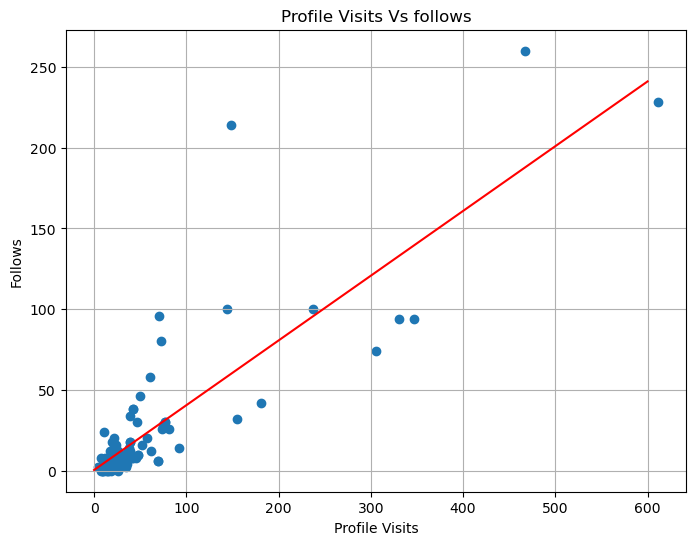

In [13]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(8,6))
plt.scatter(df['Profile Visits'],df["Follows"])
plt.title("Profile Visits Vs follows")
plt.xlabel("Profile Visits")
plt.ylabel("Follows")
plt.grid(True)
model = LinearRegression()
model.fit(df[['Profile Visits']], df['Follows'])
x_range = np.array([0, 600]).reshape(-1, 1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color='red')
plt.show()

## Question No 10
Have a look at the type of hashtags used in the posts using a wordcloud as shown below

### Answer

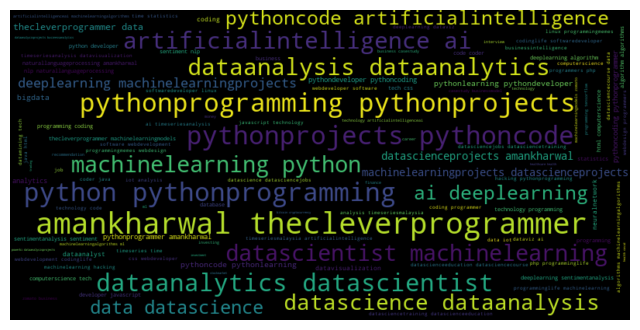

In [14]:
text = ' '.join(df['Hashtags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Question No 11
Have a look at the correlation between all the features as shown below
### Answer

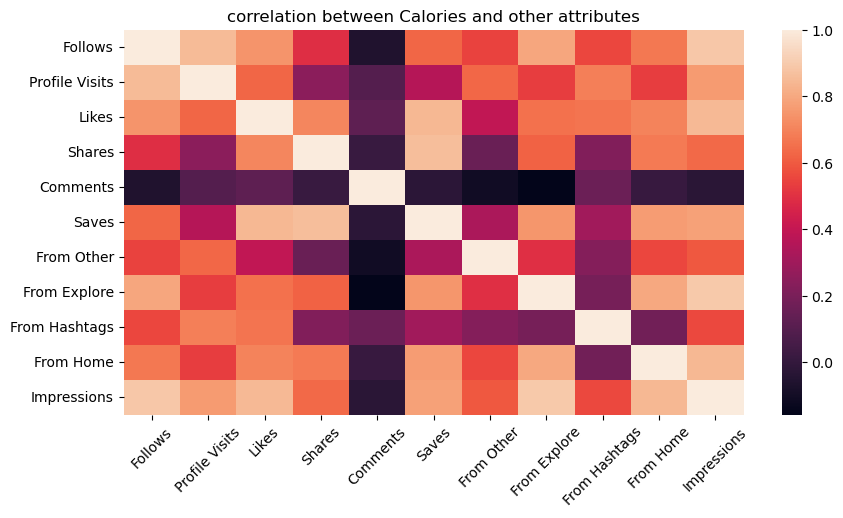

In [15]:
attributes=df[['Follows','Profile Visits','Likes','Shares','Comments','Saves','From Other',
               'From Explore','From Hashtags','From Home','Impressions']]
plt.figure(figsize=(10,5))
sns.heatmap(attributes.corr())
plt.title('correlation between Calories and other attributes')
plt.xticks(rotation=45)
plt.show()

## Question No 12
Have a look at the distribution of hashtags to see which hashtag is used the most in all the
posts as shown below

### Answer

In [16]:
counts=df["Hashtags"].str.split().explode().value_counts().reset_index()
counts.columns=['Hashtags','Count']
counts=counts.sort_values(by='Count', ascending=False)
fig=px.bar(counts,x='Hashtags',y='Count',title='Distribution of Hashtags')
fig.show()

## Question No 13
Have a look at the distribution of likes and impressions received from the presence of each
hashtag on the post as shown below

### Answer

In [17]:
df2=df.copy()
df2['Hashtags']=df2['Hashtags'].str.split()
df3=df2.explode("Hashtags")

likes_per_hashtags =df3.groupby("Hashtags")['Likes'].sum().reset_index()
fig=px.bar(likes_per_hashtags,x='Hashtags',y='Likes',title='Like Distribition for each Hashtag')
fig.show()

Impressions_per_hashtags =df3.groupby("Hashtags")['Impressions'].sum().reset_index()
fig=px.bar(Impressions_per_hashtags,x='Hashtags',y='Impressions',title='Impressions Distribition for each Hashtag')
fig.show()

## Question No 14
Write summary as per your observation
### Answer

The Instagram dataset provide insights into various aspects of social media engagement and user interactions. By exploring metrics like impressions, likes, saves, follows, and reach from different sources, one can understand the performance of posts over time and the distribution of engagement sources. Additionally, examining the relationship between profile visits and follows, analyzing hashtag usage through word clouds, and studying the correlation between different features can reveal valuable information about user behavior, content effectiveness, and popular trends on Instagram.